<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_81/blob/main/CD_Reto1_EQUIPO_81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Equipo**: 81

# **Nombres:**

Juan Carlos Garcia Rendon Martinez - A01793708

Tomás Estrada Ferreira - A01201569

# **Materia**: Ciencia y Analitica de Datos

# **Profesor**: Bernardo Charles Canales

# **Actividad**: Reto-Entrega 1 > Limpieza, análisis, visualización y kmeans

# **Fecha**: 16/11/2022

# CARGA DE DATOS, INSPECCION Y DESCARTE INICIAL DE DATOS

In [ ]:
#Cargamos librerias
#Para operaciones y dataframes
import pandas as pd
import numpy as np

#Para gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#Cargamos datos

url= "https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-JuanCarlos_GarciaRendonMartinez/main/Aguas_sub/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
df= pd.read_csv(url, sep=",", encoding_errors="replace", na_values=np.NaN)
df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CA�ADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


import geopandas as gpd
from shapely.geometry import Point

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [ ]:
#Tras revisión tenemos variables triplicadas, vamos a tirar las ultimas 15 columnas que corresponden a condiciones binarias
cumplimiento =['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE']
df.drop(cumplimiento, axis=1, inplace=True)
df.shape

(1068, 42)

In [ ]:
#Ya que el objetivo es determinar la calidad de agua según su ubicación geográfica, 
#Vamos a quitar las 8 columnas de información adicional
adicionales = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'PERIODO']
df.drop(adicionales, axis=1, inplace=True)
df.shape

(1068, 34)

In [ ]:
#Vamos a revisar filas duplicadas - No hay
df[df.duplicated()]

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES


In [ ]:
#Vamos a revisar columnas duplicadas - No hay
df.T[df.T.duplicated()].T

""
0
1
2
3
4
...
1063
1064
1065
1066


In [ ]:
#Vamos a sacar el tipo de dato de cada columna y la cuenta de elementos únicos para ver si corresponde
titulos = df.columns.tolist()
dtypes = list()
unicos = list()
missing = list()

for i in df.columns:
  dtypes.append(df[i].dtypes)
  unicos.append(df[i].nunique())
  missing.append(df[i].isna().sum())

tab = pd.DataFrame([dtypes,unicos, missing], columns=titulos)
tab

#De la revisión vemos que hay pocos elementos numéricos y la mayoría son objetos, más aún vemos que de estos varios contienen pocas clases, revisaremos columna por columna para cambiar su tipo de dato

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,...,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES
0,float64,float64,float64,object,float64,object,float64,object,object,object,...,object,object,object,object,object,object,object,object,object,object
1,1066,1067,816,4,801,5,0,925,5,4,...,61,2,31,2,362,3,615,2,3,126
2,0,0,4,4,6,6,1068,2,2,2,...,0,0,0,0,0,0,0,0,0,434


# VISUALIZACION INICIAL DE DATOS

In [ ]:
#Copiaremos el df y haremos uno nuevo por seguridad
ndf = df.copy()

In [ ]:
#Recuperamos en una lista los nombres de las columnas con tipo de objeto
objects = list()
for i in ndf.columns:
    if tab[i][0] == "O":
      objects.append(i)

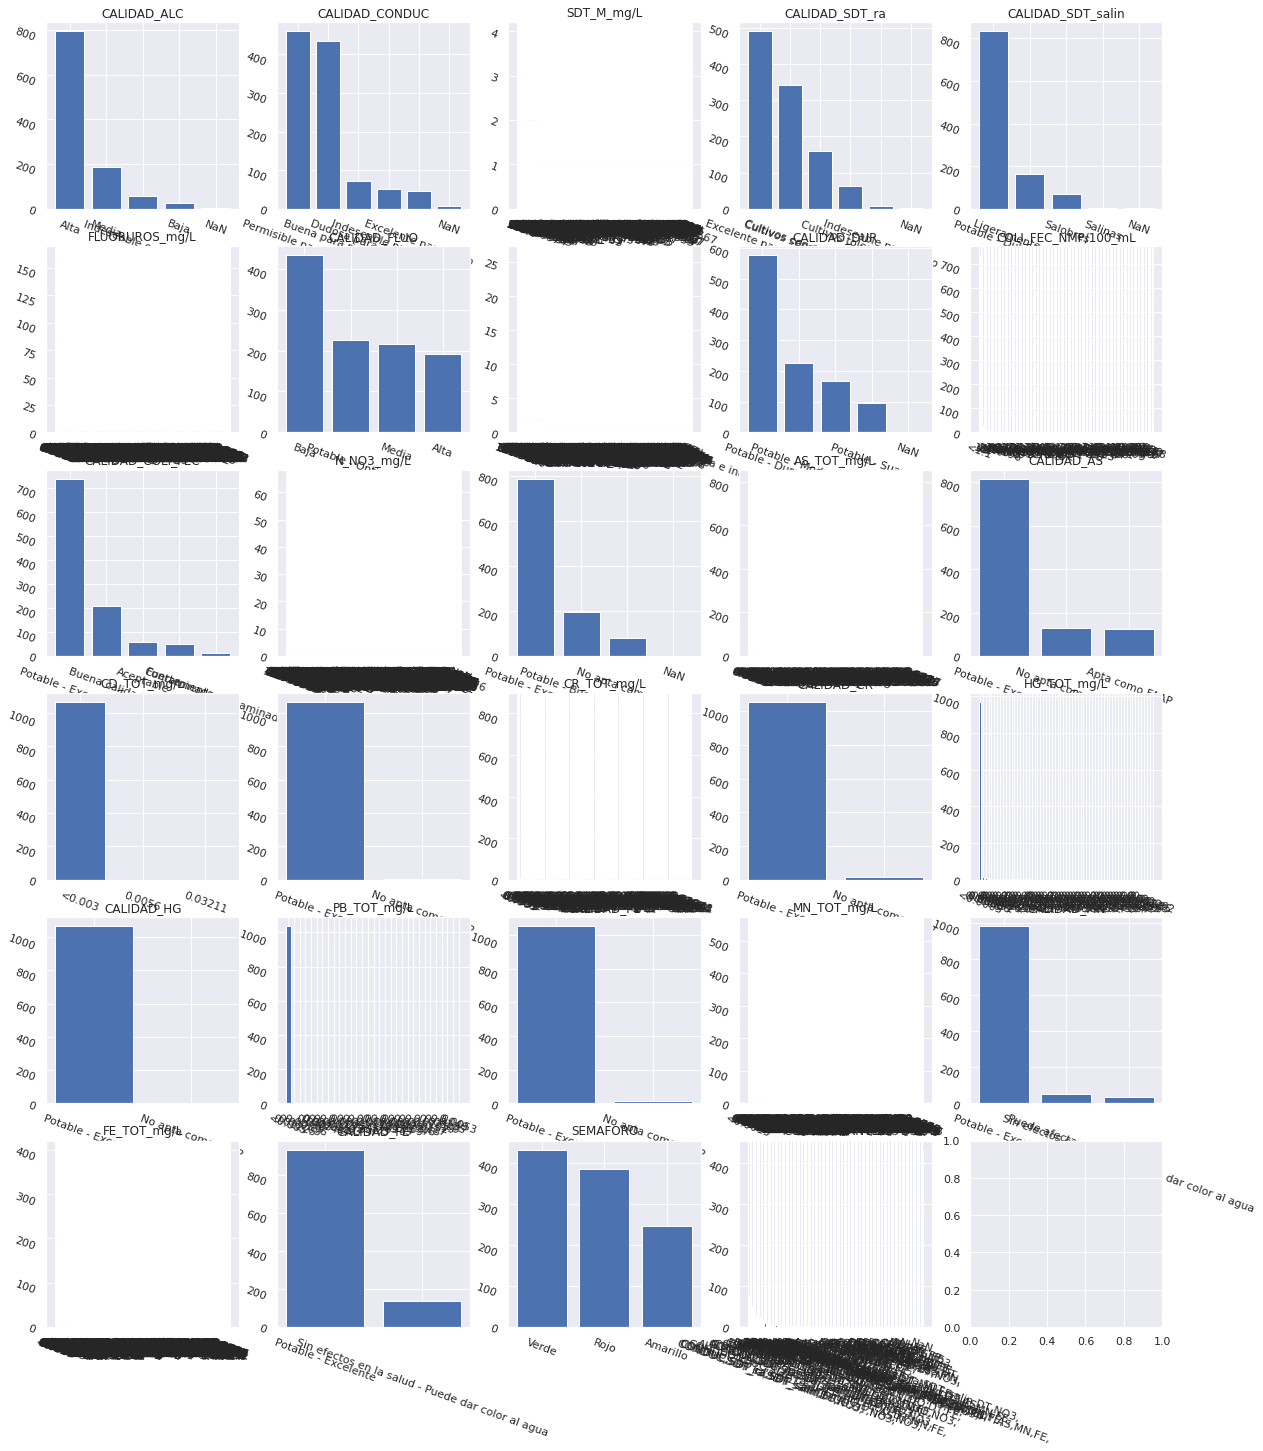

<Figure size 432x288 with 0 Axes>

In [ ]:
#Vamos a graficar todas las variables en un for, considerando la frecuencia de sus valores únicos
sns.set(rc={'figure.figsize':(20,24)})     
fig, axs = plt.subplots(6, 5)
plt.figure(figsize=(6,4))
tmp = 0

for i in ndf[objects]:

  values = list()
  counts = list()

  values = ndf[i].value_counts().keys().tolist()
  counts = ndf[i].value_counts().tolist()

  if ndf[i].isna().sum() != 0:
    values.append("NaN")
    counts.append(ndf[i].isna().sum())

  if tmp < 5:
    axs[0,tmp].bar(values, counts)
    axs[0,tmp].tick_params(labelrotation=-20)
    axs[0,tmp].set_title(i)
    tmp += 1
   
  elif tmp < 10:
    axs[1,tmp-5].bar(values, counts)
    axs[1,tmp-5].tick_params(labelrotation=-20)
    axs[1,tmp-5].set_title(i)
    tmp += 1 

  elif tmp < 15:
    axs[2,tmp-10].bar(values, counts)
    axs[2,tmp-10].tick_params(labelrotation=-20)
    axs[2,tmp-10].set_title(i)
    tmp += 1 

  elif tmp < 20:
    axs[3,tmp-15].bar(values, counts)
    axs[3,tmp-15].tick_params(labelrotation=-20)
    axs[3,tmp-15].set_title(i)
    tmp += 1 

  elif tmp < 25:
    axs[4,tmp-20].bar(values, counts)
    axs[4,tmp-20].tick_params(labelrotation=-20)
    axs[4,tmp-20].set_title(i)
    tmp += 1             

  elif tmp < 30:
    axs[5,tmp-25].bar(values, counts)
    axs[5,tmp-25].tick_params(labelrotation=-20)
    axs[5,tmp-25].set_title(i)
    tmp += 1             

#Tras inspeccionar los gráficos vemos que las variables algunas parables son en realidad continuas y otras mixtas,
#Revisaremos una por una la situación

# DEPURACIÓN DE DATOS Y MANIPULACIÓN DE TIPOS DE DATOS

In [ ]:
#Analizamos las variables más a detalle
n=5  #Definimos el top de frecuencias a analizar
#SDT_mg/L
ndf["SDT_mg/L"]

#Está completamente vacía, eliminaremos la columna
ndf.drop("SDT_mg/L",axis = 1, inplace= True)

In [ ]:
#SDT_M_mg/L
print(ndf["SDT_M_mg/L"])
print(tab["SDT_M_mg/L"])
ndf["SDT_M_mg/L"].value_counts()[:n]
#Tiene 925 valores únicos y 2 faltantes, vemos que contiene un <25
#Separaremos en 2 variables, una discreta y otra continua

ndf["SDT_M_mg/L_menor"] = (ndf["SDT_M_mg/L"] == "<25").astype(int)
ndf["SDT_M_mg/L"].replace("<25", 0, inplace= True)
ndf["SDT_M_mg/L"] = pd.to_numeric(ndf["SDT_M_mg/L"])
ndf[["SDT_M_mg/L_menor","SDT_M_mg/L"]]
#Quedó dividida en 2

0          603.6
1          445.4
2            342
3          478.6
4           1179
          ...   
1063      1545.8
1064         297
1065        1873
1066    690.6667
1067         495
Name: SDT_M_mg/L, Length: 1068, dtype: object
0    object
1       925
2         2
Name: SDT_M_mg/L, dtype: object


,SDT_M_mg/L_menor,SDT_M_mg/L
0,0,603.6000
1,0,445.4000
2,0,342.0000
3,0,478.6000
4,0,1179.0000
...,...,...
1063,0,1545.8000
1064,0,297.0000
1065,0,1873.0000
1066,0,690.6667


In [ ]:
#FLUORUROS_mg/L
print(ndf["FLUORUROS_mg/L"])
print(tab["FLUORUROS_mg/L"])
print(ndf["FLUORUROS_mg/L"].value_counts()[:n])
#Tiene 862 valores únicos y 0 faltantes, vemos que <0.2 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra continua

ndf["FLUORUROS_mg/L_menor"] = (ndf["FLUORUROS_mg/L"] == "<0.2").astype(int)
ndf["FLUORUROS_mg/L"].replace("<0.2", 0, inplace= True)
ndf["FLUORUROS_mg/L"] = pd.to_numeric(ndf["FLUORUROS_mg/L"])
ndf[["FLUORUROS_mg/L_menor","FLUORUROS_mg/L"]]
#Quedó dividida en 2

0       0.9766
1       0.9298
2       1.8045
3       1.1229
4       0.2343
         ...  
1063      <0.2
1064      <0.2
1065    0.7574
1066    0.7108
1067    0.4002
Name: FLUORUROS_mg/L, Length: 1068, dtype: object
0    object
1       862
2         0
Name: FLUORUROS_mg/L, dtype: object
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
Name: FLUORUROS_mg/L, dtype: int64


,FLUORUROS_mg/L_menor,FLUORUROS_mg/L
0,0,0.9766
1,0,0.9298
2,0,1.8045
3,0,1.1229
4,0,0.2343
...,...,...
1063,1,0.0000
1064,1,0.0000
1065,0,0.7574
1066,0,0.7108


In [ ]:
#DUR_mg/L
print(ndf["DUR_mg/L"])
print(tab["DUR_mg/L"])
print(ndf["DUR_mg/L"].value_counts()[:n])
#Tiene 889 valores únicos y 1 faltantes, vemos que <20 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra continua

#DUR_mg/L
ndf["DUR_mg/L_menor"] = (ndf["DUR_mg/L"] == "<20").astype(int)
ndf["DUR_mg/L"].replace("<20", 0, inplace= True)
ndf["DUR_mg/L"] = pd.to_numeric(ndf["DUR_mg/L"])
ndf[["DUR_mg/L_menor","DUR_mg/L"]]
#Queda dividada

0        213.732
1       185.0514
2        120.719
3        199.879
4       476.9872
          ...   
1063     752.096
1064         273
1065    660.2126
1066     406.368
1067     362.544
Name: DUR_mg/L, Length: 1068, dtype: object
0    object
1       889
2         1
Name: DUR_mg/L, dtype: object
<20        26
121.512     6
53.8542     4
109.56      4
428.27      3
Name: DUR_mg/L, dtype: int64


,DUR_mg/L_menor,DUR_mg/L
0,0,213.7320
1,0,185.0514
2,0,120.7190
3,0,199.8790
4,0,476.9872
...,...,...
1063,0,752.0960
1064,0,273.0000
1065,0,660.2126
1066,0,406.3680


In [ ]:
#COLI_FEC_NMP/100_mL
print(ndf["COLI_FEC_NMP/100_mL"])
print(tab["COLI_FEC_NMP/100_mL"])
print(ndf["COLI_FEC_NMP/100_mL"].value_counts()[:n])
#Tiene 125 valores únicos y 0 faltantes, vemos que <1.1 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra entera

ndf["COLI_FEC_NMP/100_mL_menor"] = (ndf["COLI_FEC_NMP/100_mL"] == "<1.1").astype(int)
ndf["COLI_FEC_NMP/100_mL"].replace("<1.1", 0, inplace= True)
ndf["COLI_FEC_NMP/100_mL"] = pd.to_numeric(ndf["COLI_FEC_NMP/100_mL"],downcast="float")
ndf[["COLI_FEC_NMP/100_mL_menor","COLI_FEC_NMP/100_mL"]]
#Quedó dividida en 2

0       <1.1
1       <1.1
2       <1.1
3       <1.1
4        291
        ... 
1063    <1.1
1064    <1.1
1065     620
1066    <1.1
1067    <1.1
Name: COLI_FEC_NMP/100_mL, Length: 1068, dtype: object
0    object
1       125
2         0
Name: COLI_FEC_NMP/100_mL, dtype: object
<1.1    737
10       37
40       28
20       19
31       13
Name: COLI_FEC_NMP/100_mL, dtype: int64


,COLI_FEC_NMP/100_mL_menor,COLI_FEC_NMP/100_mL
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,0,291.0
...,...,...
1063,1,0.0
1064,1,0.0
1065,0,620.0
1066,1,0.0


In [ ]:
#N_NO3_mg/L
print(ndf["N_NO3_mg/L"])
print(tab["N_NO3_mg/L"])
ndf["N_NO3_mg/L"].value_counts()[:n]
#Tiene 995 valores únicos y 0 faltantes, vemos que <0.02 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra entera

ndf["N_NO3_mg/L_menor"] = (ndf["N_NO3_mg/L"] == "<0.02").astype(int)
ndf["N_NO3_mg/L"].replace("<0.02", 0, inplace= True)
ndf["N_NO3_mg/L"] = pd.to_numeric(ndf["N_NO3_mg/L"])
ndf[["N_NO3_mg/L_menor","N_NO3_mg/L"]]
#Quedó dividida en 2

0        4.184656
1         5.75011
2        1.449803
3        1.258597
4       15.672251
          ...    
1063    14.615488
1064       77.392
1065    36.477104
1066        <0.02
1067     0.811876
Name: N_NO3_mg/L, Length: 1068, dtype: object
0    object
1       995
2         1
Name: N_NO3_mg/L, dtype: object


,N_NO3_mg/L_menor,N_NO3_mg/L
0,0,4.184656
1,0,5.750110
2,0,1.449803
3,0,1.258597
4,0,15.672251
...,...,...
1063,0,14.615488
1064,0,77.392000
1065,0,36.477104
1066,1,0.000000


In [ ]:
#AS_TOT_mg/L
print(ndf["AS_TOT_mg/L"])
print(tab["AS_TOT_mg/L"])
ndf["AS_TOT_mg/L"].value_counts()[:n]
#Tiene 209 valores únicos y 0 faltantes, vemos que <0.01 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra entera

ndf["AS_TOT_mg/L_menor"] = (ndf["AS_TOT_mg/L"] == "<0.01").astype(int)
ndf["AS_TOT_mg/L"].replace("<0.01", 0, inplace= True)
ndf["AS_TOT_mg/L"] = pd.to_numeric(ndf["AS_TOT_mg/L"])
ndf[["AS_TOT_mg/L_menor","AS_TOT_mg/L"]]
#Quedó dividida en 2

0       0.0161
1       0.0134
2        0.037
3       0.0154
4        <0.01
         ...  
1063     <0.01
1064     <0.01
1065     <0.01
1066     <0.01
1067     <0.01
Name: AS_TOT_mg/L, Length: 1068, dtype: object
0    object
1       209
2         0
Name: AS_TOT_mg/L, dtype: object


,AS_TOT_mg/L_menor,AS_TOT_mg/L
0,0,0.0161
1,0,0.0134
2,0,0.0370
3,0,0.0154
4,1,0.0000
...,...,...
1063,1,0.0000
1064,1,0.0000
1065,1,0.0000
1066,1,0.0000


In [ ]:
#CR_TOT_mg/L
print(ndf["CR_TOT_mg/L"])
print(tab["CR_TOT_mg/L"])
ndf["CR_TOT_mg/L"].value_counts()[:n]
#Tiene 168 valores únicos y 0 faltantes, vemos que <0.005 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra entera

ndf["CR_TOT_mg/L_menor"] = (ndf["CR_TOT_mg/L"] == "<0.005").astype(int)
ndf["CR_TOT_mg/L"].replace("<0.005", 0, inplace= True)
ndf["CR_TOT_mg/L"] = pd.to_numeric(ndf["CR_TOT_mg/L"])
ndf[["CR_TOT_mg/L_menor","CR_TOT_mg/L"]]
#Quedó dividida en 2

0       <0.005
1       <0.005
2       <0.005
3        0.005
4       <0.005
         ...  
1063    <0.005
1064    <0.005
1065    <0.005
1066    <0.005
1067    <0.005
Name: CR_TOT_mg/L, Length: 1068, dtype: object
0    object
1       168
2         0
Name: CR_TOT_mg/L, dtype: object


,CR_TOT_mg/L_menor,CR_TOT_mg/L
0,1,0.000
1,1,0.000
2,1,0.000
3,0,0.005
4,1,0.000
...,...,...
1063,1,0.000
1064,1,0.000
1065,1,0.000
1066,1,0.000


In [ ]:
#HG_TOT_mg/L
print(ndf["HG_TOT_mg/L"])
print(tab["HG_TOT_mg/L"])
ndf["HG_TOT_mg/L"].value_counts()[:n]
#Tiene 61 valores únicos y 0 faltantes, vemos que <0.0005 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra entera

ndf["HG_TOT_mg/L_menor"] = (ndf["HG_TOT_mg/L"] == "<0.0005").astype(int)
ndf["HG_TOT_mg/L"].replace("<0.0005", 0, inplace= True)
ndf["HG_TOT_mg/L"] = pd.to_numeric(ndf["HG_TOT_mg/L"])
ndf[["HG_TOT_mg/L_menor","HG_TOT_mg/L"]]
#Quedó dividida en 2

0       <0.0005
1       <0.0005
2       <0.0005
3       <0.0005
4       <0.0005
         ...   
1063    <0.0005
1064    <0.0005
1065    <0.0005
1066    <0.0005
1067    <0.0005
Name: HG_TOT_mg/L, Length: 1068, dtype: object
0    object
1        61
2         0
Name: HG_TOT_mg/L, dtype: object


,HG_TOT_mg/L_menor,HG_TOT_mg/L
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0
...,...,...
1063,1,0.0
1064,1,0.0
1065,1,0.0
1066,1,0.0


In [ ]:
#PB_TOT_mg/L
print(ndf["PB_TOT_mg/L"])
print(tab["PB_TOT_mg/L"])
ndf["PB_TOT_mg/L"].value_counts()[:n]
#Tiene 31 valores únicos y 0 faltantes, vemos que <0.005 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra entera

ndf["PB_TOT_mg/L_menor"] = (ndf["PB_TOT_mg/L"] == "<0.005").astype(int)
ndf["PB_TOT_mg/L"].replace("<0.005", 0, inplace= True)
ndf["PB_TOT_mg/L"] = pd.to_numeric(ndf["PB_TOT_mg/L"])
ndf[["PB_TOT_mg/L_menor","PB_TOT_mg/L"]]
#Quedó dividida en 2

0       <0.005
1       <0.005
2       <0.005
3       <0.005
4       <0.005
         ...  
1063    <0.005
1064    <0.005
1065    <0.005
1066    <0.005
1067    <0.005
Name: PB_TOT_mg/L, Length: 1068, dtype: object
0    object
1        31
2         0
Name: PB_TOT_mg/L, dtype: object


,PB_TOT_mg/L_menor,PB_TOT_mg/L
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0
...,...,...
1063,1,0.0
1064,1,0.0
1065,1,0.0
1066,1,0.0


In [ ]:
#MN_TOT_mg/L
print(ndf["MN_TOT_mg/L"])
print(tab["MN_TOT_mg/L"])
ndf["MN_TOT_mg/L"].value_counts()[:n]
#Tiene 362 valores únicos y 0 faltantes, vemos que <0.0015 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra entera

ndf["MN_TOT_mg/L_menor"] = (ndf["MN_TOT_mg/L"] == "<0.0015").astype(int)
ndf["MN_TOT_mg/L"].replace("<0.0015", 0, inplace= True)
ndf["MN_TOT_mg/L"] = pd.to_numeric(ndf["MN_TOT_mg/L"])
ndf[["MN_TOT_mg/L_menor","MN_TOT_mg/L"]]
#Quedó dividida en 2

0       <0.0015
1       <0.0015
2       <0.0015
3       <0.0015
4       <0.0015
         ...   
1063    <0.0015
1064    0.00709
1065     0.0242
1066      0.012
1067    <0.0015
Name: MN_TOT_mg/L, Length: 1068, dtype: object
0    object
1       362
2         0
Name: MN_TOT_mg/L, dtype: object


,MN_TOT_mg/L_menor,MN_TOT_mg/L
0,1,0.00000
1,1,0.00000
2,1,0.00000
3,1,0.00000
4,1,0.00000
...,...,...
1063,1,0.00000
1064,0,0.00709
1065,0,0.02420
1066,0,0.01200


In [ ]:
#FE_TOT_mg/L
print(ndf["FE_TOT_mg/L"])
print(tab["FE_TOT_mg/L"])
ndf["FE_TOT_mg/L"].value_counts()[:n]
#Tiene 615 valores únicos y 0 faltantes, vemos que <0.025 se repite muchas veces
#Separaremos en 2 variables, una discreta y otra entera

ndf["FE_TOT_mg/L_menor"] = (ndf["FE_TOT_mg/L"] == "<0.025").astype(int)
ndf["FE_TOT_mg/L"].replace("<0.025", 0, inplace= True)
ndf["FE_TOT_mg/L"] = pd.to_numeric(ndf["FE_TOT_mg/L"])
ndf[["FE_TOT_mg/L_menor","FE_TOT_mg/L"]]
#Quedó dividida en 2

0        0.0891
1        <0.025
2        <0.025
3        <0.025
4        <0.025
         ...   
1063     <0.025
1064    0.07578
1065     0.2129
1066     0.1786
1067     <0.025
Name: FE_TOT_mg/L, Length: 1068, dtype: object
0    object
1       615
2         0
Name: FE_TOT_mg/L, dtype: object


,FE_TOT_mg/L_menor,FE_TOT_mg/L
0,0,0.08910
1,1,0.00000
2,1,0.00000
3,1,0.00000
4,1,0.00000
...,...,...
1063,1,0.00000
1064,0,0.07578
1065,0,0.21290
1066,0,0.17860


In [ ]:
#CONTAMINANTES
print(ndf["CONTAMINANTES"])
print(tab["CONTAMINANTES"])
ndf["CONTAMINANTES"].value_counts()[:n]
#Tiene 126 valores únicos y 434 faltantes
#Se ven categorias, las separo en cada columna

ndf = pd.concat([ndf, ndf["CONTAMINANTES"].str.get_dummies(sep=',')], axis= 1)
ndf.drop("CONTAMINANTES", axis= 1, inplace= True)
ndf.iloc[: , -16:]

0                  NaN
1                  NaN
2             FLUO,AS,
3                  NaN
4                 NO3,
             ...      
1063    CONDUC,DT,NO3,
1064              NO3,
1065    CONDUC,DT,NO3,
1066               NaN
1067               NaN
Name: CONTAMINANTES, Length: 1068, dtype: object
0    object
1       126
2       434
Name: CONTAMINANTES, dtype: object


,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1064,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1065,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Así se ve nuestro dataframe tras la manipulación de datos
ndf.head()

,LONGITUD,LATITUD,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,...,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,-102.02210,22.20887,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,...,0,0,0,0,0,0,0,0,0,0
1,-102.20075,21.99958,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,...,0,0,0,0,0,0,0,0,0,0
2,-102.28801,22.36685,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,...,0,0,1,0,0,0,0,0,0,0
3,-102.29449,22.18435,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,...,0,0,0,0,0,0,0,0,0,0
4,-110.24480,23.45138,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,...,0,0,0,0,0,0,1,0,0,0


# SEGUNDO ANALISIS Y VISUALIZACIÓN DE DATOS

In [ ]:
#Obtenemos su nueva dimensión
ndf.shape

(1068, 59)

In [ ]:
# Calculamos nuevamente los tipos de datos y faltantes
titulos = ndf.columns.tolist()
dtypes = list()
unicos = list()
missing = list()

for i in ndf.columns:
  dtypes.append(ndf[i].dtypes)
  unicos.append(ndf[i].nunique())
  missing.append(ndf[i].isna().sum())

tab = pd.DataFrame([dtypes,unicos, missing], columns=titulos)
print(tab.to_string())

  LONGITUD  LATITUD ALC_mg/L CALIDAD_ALC CONDUCT_mS/cm CALIDAD_CONDUC SDT_M_mg/L CALIDAD_SDT_ra CALIDAD_SDT_salin FLUORUROS_mg/L CALIDAD_FLUO DUR_mg/L CALIDAD_DUR COLI_FEC_NMP/100_mL CALIDAD_COLI_FEC N_NO3_mg/L CALIDAD_N_NO3 AS_TOT_mg/L CALIDAD_AS CD_TOT_mg/L CALIDAD_CD CR_TOT_mg/L CALIDAD_CR HG_TOT_mg/L CALIDAD_HG PB_TOT_mg/L CALIDAD_PB MN_TOT_mg/L CALIDAD_MN FE_TOT_mg/L CALIDAD_FE SEMAFORO SDT_M_mg/L_menor FLUORUROS_mg/L_menor DUR_mg/L_menor COLI_FEC_NMP/100_mL_menor N_NO3_mg/L_menor AS_TOT_mg/L_menor CR_TOT_mg/L_menor HG_TOT_mg/L_menor PB_TOT_mg/L_menor MN_TOT_mg/L_menor FE_TOT_mg/L_menor    ALC     AS     CD     CF CONDUC     CR     DT     FE   FLUO     HG     MN     NI    NO3     PB SDT_ra SDT_salin
0  float64  float64  float64      object       float64         object    float64         object            object        float64       object  float64      object             float32           object    float64        object     float64     object      object     object     float64    

In [ ]:
#Ya que tenemos variables que representan la misma magnitud, las vamos a agrupar para analizarlas en conjunto
alc = ["ALC_mg/L", "CALIDAD_ALC"]
conduct = ["CONDUCT_mS/cm", "CALIDAD_CONDUC"]
sdt = ["SDT_M_mg/L","CALIDAD_SDT_ra", "CALIDAD_SDT_salin", "SDT_M_mg/L_menor"]
fluor = ["FLUORUROS_mg/L", "CALIDAD_FLUO", "FLUORUROS_mg/L_menor"]
dur = ["DUR_mg/L", "CALIDAD_DUR", "DUR_mg/L_menor"]
coli = ["COLI_FEC_NMP/100_mL", "CALIDAD_COLI_FEC", "COLI_FEC_NMP/100_mL_menor"]
no3 = ["N_NO3_mg/L", "CALIDAD_N_NO3", "N_NO3_mg/L_menor", ]
astot = ["AS_TOT_mg/L", "CALIDAD_AS", "AS_TOT_mg/L_menor"]
cd = ["CD_TOT_mg/L", "CALIDAD_CD"]
cr = ["CR_TOT_mg/L", "CALIDAD_CR", "CR_TOT_mg/L_menor"]
hg = ["HG_TOT_mg/L", "CALIDAD_HG", "HG_TOT_mg/L_menor"]
pb = ["PB_TOT_mg/L", "CALIDAD_PB", "PB_TOT_mg/L_menor"]
mn = ["MN_TOT_mg/L", "CALIDAD_MN", "MN_TOT_mg/L_menor"]
fe = ["FE_TOT_mg/L", "CALIDAD_FE", "FE_TOT_mg/L_menor"]
cont = ["ALC", "AS", "CD", "CF", "CONDUC", "CR", "DT", "FE", "FLUO", "HG", "MN", "NI", "NO3", "PB", "SDT_ra", "SDT_salin"]

#Vamos a graficar cada uno de estos grupos más, longitud+latitud, semáforo y contaminantes

In [ ]:
from tabulate import tabulate

#Vamos a hacer una función que nos sirva para graficar según el tipo de dato
def graficas(X):
  for x in range(len(ndf[X].columns)):

    values = list()
    counts = list()
    feature = ndf[X].iloc[:,x]

    if feature.dtypes == "O"  or feature.dtypes == "int":       #Graficas de frecuencias para objetos o str
      values = feature.value_counts().keys().tolist()
      counts = feature.value_counts().tolist()

      if feature.isna().sum() != 0:
        values.append("NaN")
        counts.append(ndf[i].isna().sum())

      print(f"\n{tabulate([counts], headers = values)}")

      plt.figure(figsize=(6,5))
      plt.bar(values, counts)
      plt.xticks(ticks=values, rotation = -20)
      plt.title(ndf[X].columns[x])
      plt.show()

    elif feature.dtypes == "float64" or feature.dtypes == "float32":       #Graficas de histogramas para flotantes
       print(feature.describe())

       fig, axs = plt.subplots(1, 2, figsize=(12,5))
       
       plt.subplot(1, 2, 1)
       plt.hist(feature, bins=20)
       plt.title(ndf[X].columns[x])

       plt.subplot(1, 2, 2)
       ndf[[ndf[X].columns[x]]].boxplot(figsize=(6,5))
       plt.title(ndf[X].columns[x])    
      
       plt.show()

count    1064.000000
mean      235.633759
std       116.874291
min        26.640000
25%       164.000000
50%       215.527500
75%       292.710000
max      1650.000000
Name: ALC_mg/L, dtype: float64


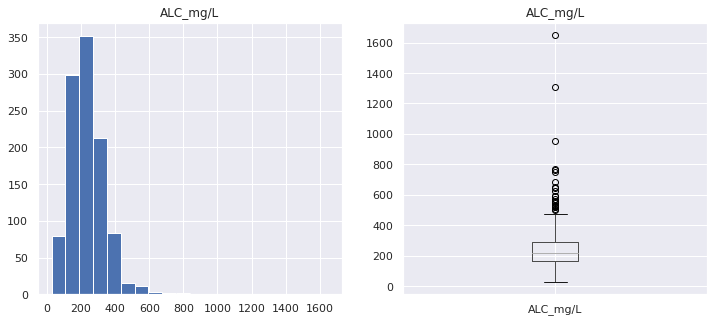


  Alta    Media    Indeseable como FAAP    Baja    NaN
------  -------  ----------------------  ------  -----
   794      187                      59      24      0


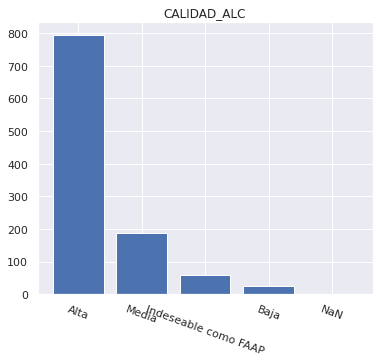

In [ ]:
#Graficamos cada uno de los objetos
graficas(alc)

count     1062.000000
mean      1138.953013
std       1245.563674
min         50.400000
25%        501.750000
50%        815.000000
75%       1322.750000
max      18577.000000
Name: CONDUCT_mS/cm, dtype: float64


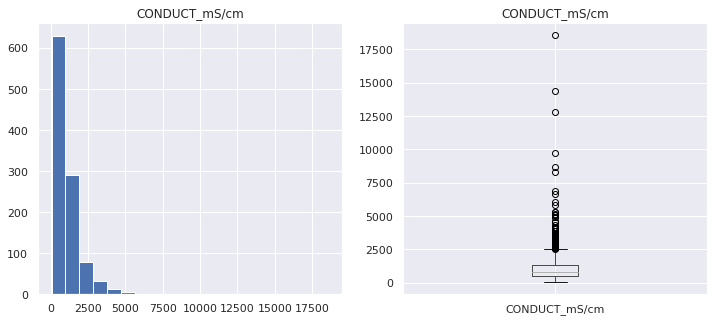


  Permisible para riego    Buena para riego    Dudosa para riego    Indeseable para riego    Excelente para riego    NaN
-----------------------  ------------------  -------------------  -----------------------  ----------------------  -----
                    460                 434                   72                       51                      45      0


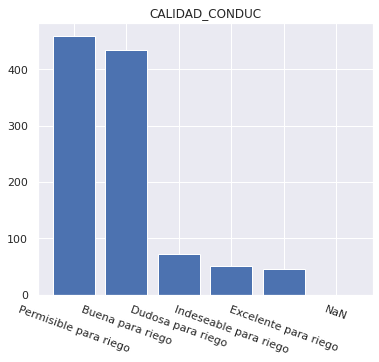

In [ ]:
graficas(conduct)

count     1066.000000
mean       896.078115
std       2751.538128
min          0.000000
25%        337.500000
50%        550.400000
75%        916.100000
max      82170.000000
Name: SDT_M_mg/L, dtype: float64


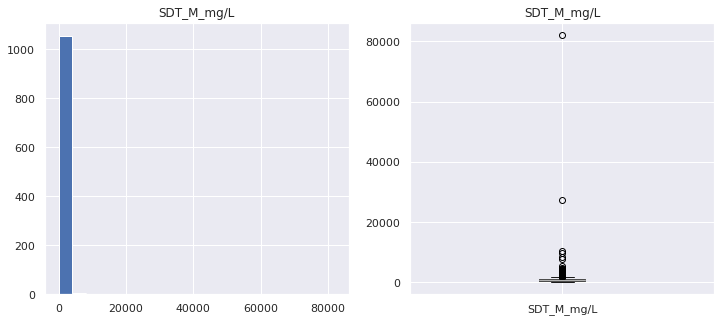


  Excelente para riego    Cultivos sensibles    Cultivos con manejo especial    Cultivos tolerantes    Indeseable para riego    NaN
----------------------  --------------------  ------------------------------  ---------------------  -----------------------  -----
                   491                   343                             161                     64                        7      0


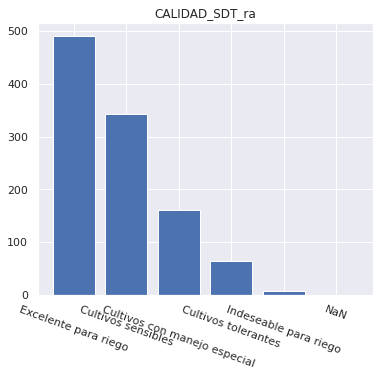


  Potable - Dulce    Ligeramente salobres    Salobres    Salinas    NaN
-----------------  ----------------------  ----------  ---------  -----
              834                     161          68          3      0


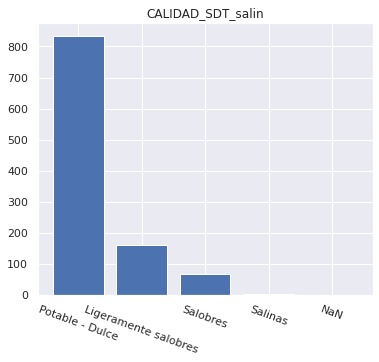


   0    1
----  ---
1067    1


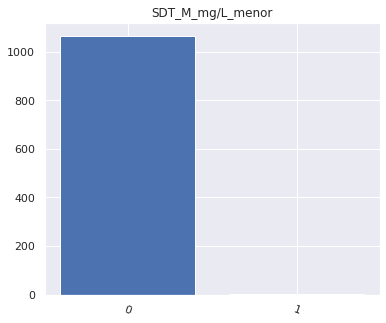

In [ ]:
graficas(sdt)

count    1068.000000
mean        1.045263
std         1.939375
min         0.000000
25%         0.267175
50%         0.503500
75%         1.139850
max        34.803300
Name: FLUORUROS_mg/L, dtype: float64


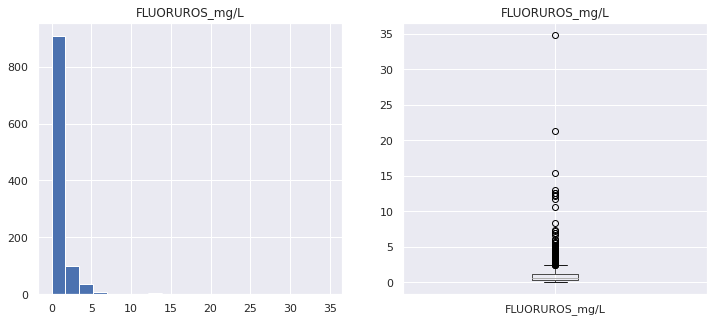


  Baja    Potable - Optima    Media    Alta
------  ------------------  -------  ------
   434                 226      216     192


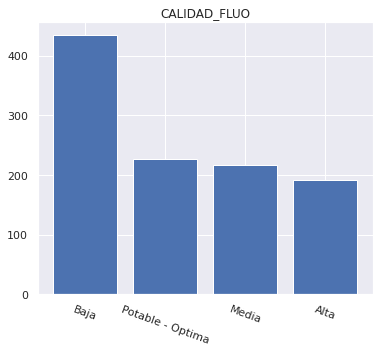


  0    1
---  ---
906  162


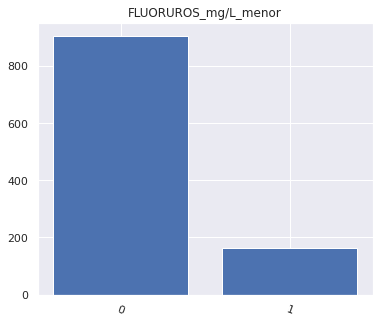

In [ ]:
graficas(fluor)

count    1067.000000
mean      347.450725
std       360.127162
min         0.000000
25%       121.194800
50%       245.335800
75%       453.930000
max      3810.692200
Name: DUR_mg/L, dtype: float64


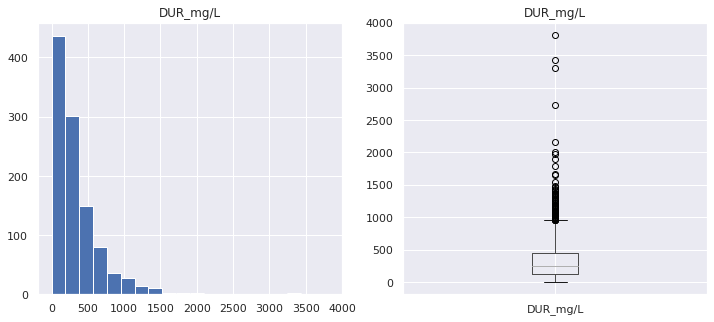


  Potable - Dura    Muy dura e indeseable usos industrial y domestico    Potable - Moderadamente suave    Potable - Suave    NaN
----------------  ---------------------------------------------------  -------------------------------  -----------------  -----
             577                                                  226                              168                 96      0


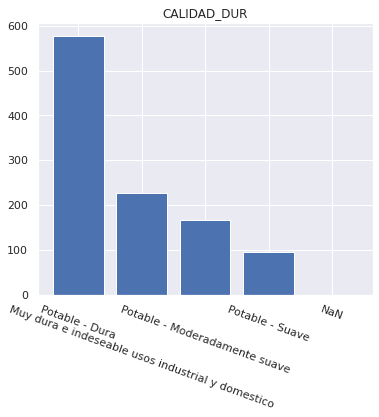


   0    1
----  ---
1042   26


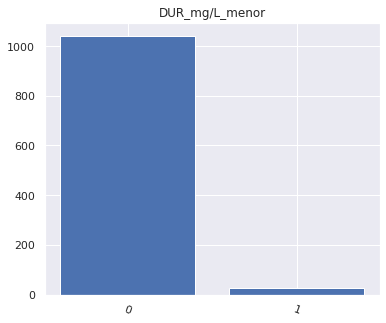

In [ ]:
graficas(dur)

count     1068.000000
mean       354.731262
std       2052.588379
min          0.000000
25%          0.000000
50%          0.000000
75%         13.250000
max      24196.000000
Name: COLI_FEC_NMP/100_mL, dtype: float64


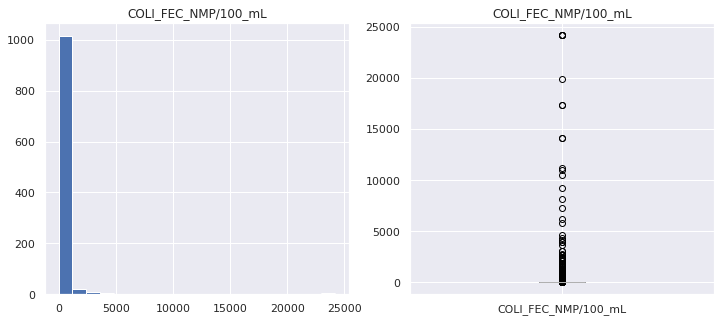


  Potable - Excelente    Buena calidad    Aceptable    Contaminada    Fuertemente contaminada
---------------------  ---------------  -----------  -------------  -------------------------
                  739              208           60             49                         12


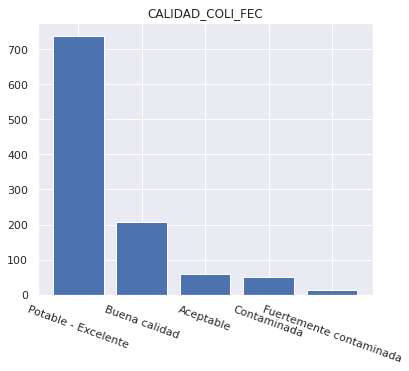


  1    0
---  ---
737  331


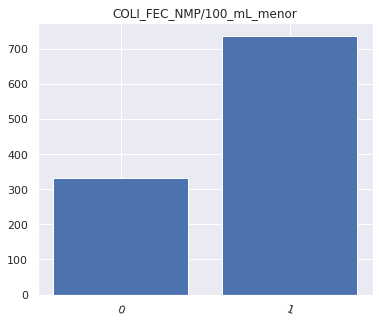

In [ ]:
graficas(coli)

count    1067.000000
mean        4.318540
std         8.345763
min         0.000000
25%         0.650294
50%         2.080932
75%         5.201698
max       121.007813
Name: N_NO3_mg/L, dtype: float64


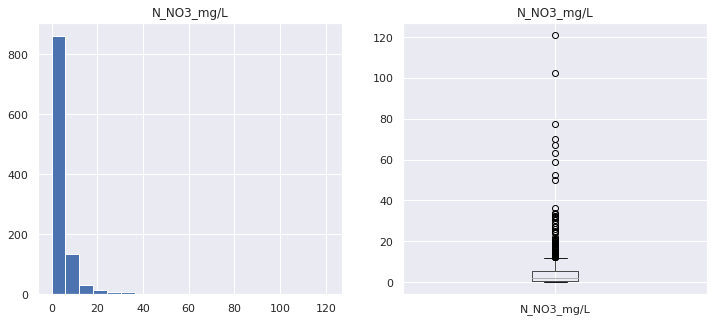


  Potable - Excelente    Potable - Buena calidad    No apta como FAAP    NaN
---------------------  -------------------------  -------------------  -----
                  788                        197                   82      0


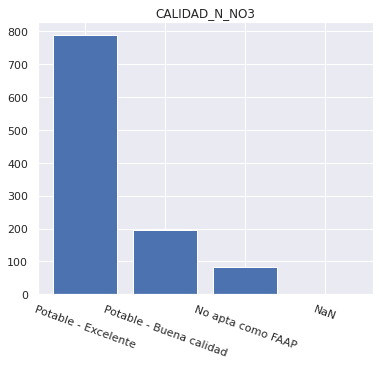


   0    1
----  ---
1003   65


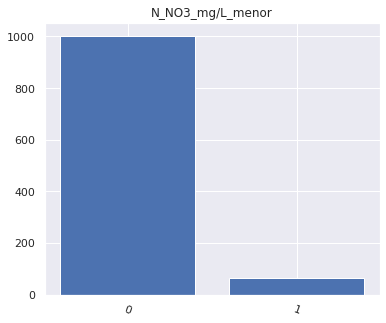

In [ ]:
graficas(no3)

count    1068.000000
mean        0.011987
std         0.037480
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.452200
Name: AS_TOT_mg/L, dtype: float64


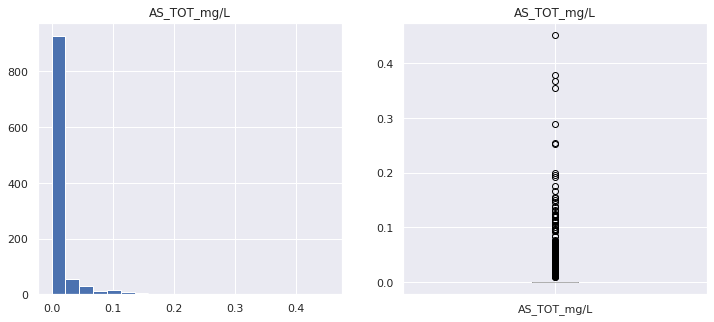


  Potable - Excelente    No apta como FAAP    Apta como FAAP
---------------------  -------------------  ----------------
                  816                  127               125


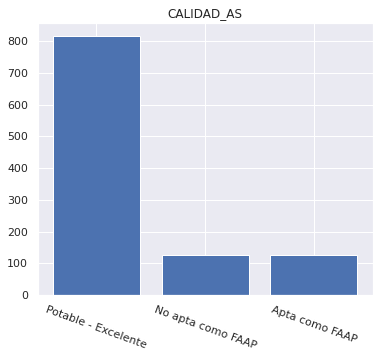


  1    0
---  ---
815  253


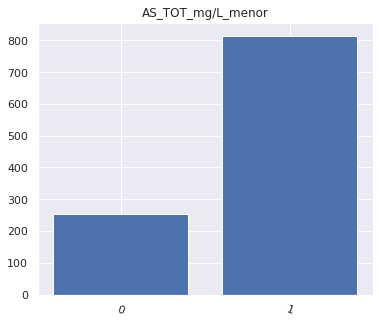

In [ ]:
graficas(astot)


  <0.003    0.0056    0.03211
--------  --------  ---------
    1066         1          1


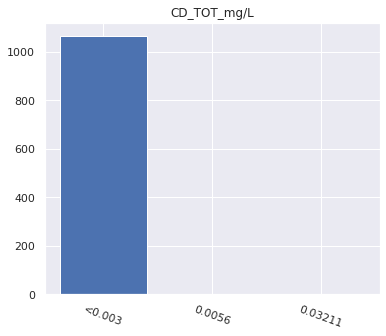


  Potable - Excelente    No apta como FAAP
---------------------  -------------------
                 1066                    2


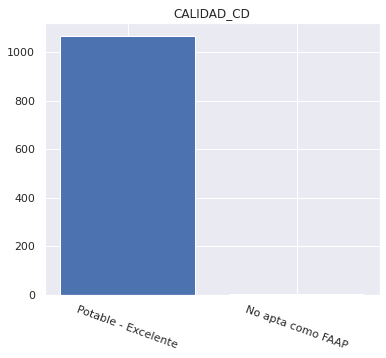

In [ ]:
graficas(cd)

count    1068.000000
mean        0.009277
std         0.154619
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.003200
Name: CR_TOT_mg/L, dtype: float64


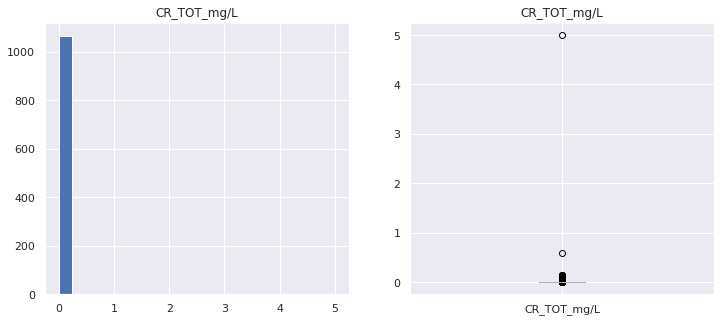


  Potable - Excelente    No apta como FAAP
---------------------  -------------------
                 1053                   15


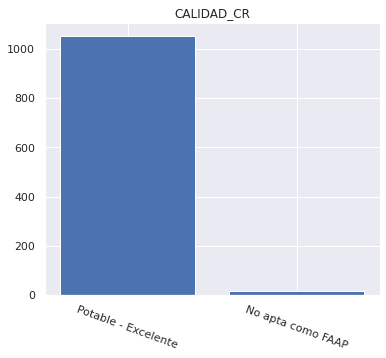


  1    0
---  ---
854  214


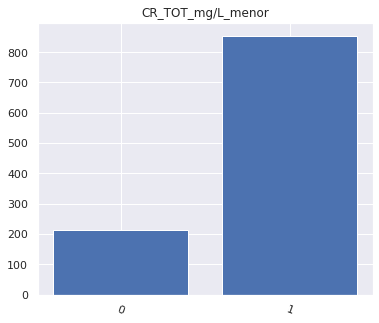

In [ ]:
graficas(cr)

count    1068.000000
mean        0.000104
std         0.000540
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.014150
Name: HG_TOT_mg/L, dtype: float64


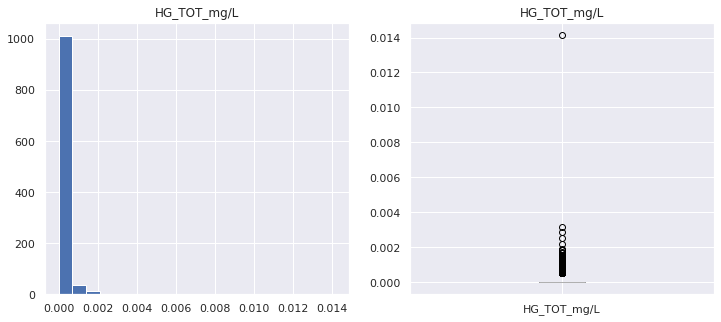


  Potable - Excelente    No apta como FAAP
---------------------  -------------------
                 1067                    1


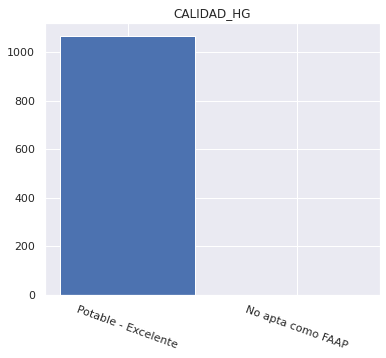


  1    0
---  ---
968  100


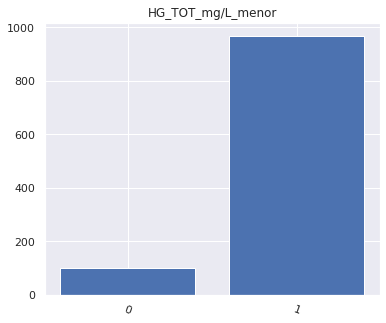

In [ ]:
graficas(hg)

count    1068.000000
mean        0.000422
std         0.003743
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.080900
Name: PB_TOT_mg/L, dtype: float64


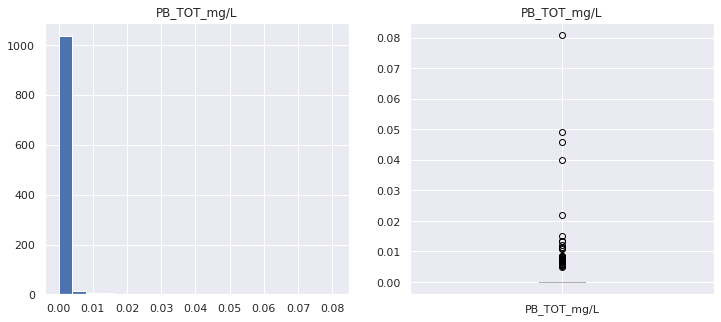


  Potable - Excelente    No apta como FAAP
---------------------  -------------------
                 1056                   12


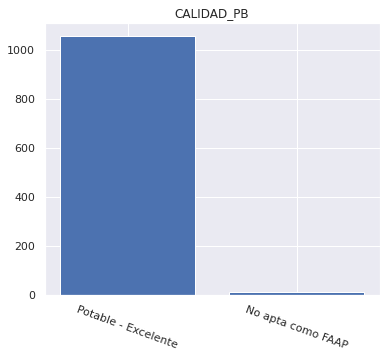


   1    0
----  ---
1038   30


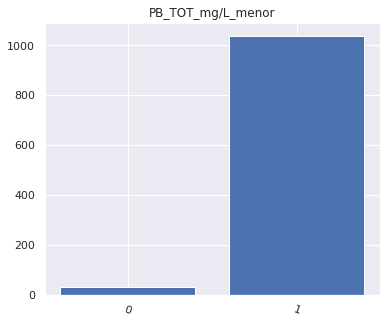

In [ ]:
graficas(pb)

count    1068.000000
mean        0.071713
std         0.376658
min         0.000000
25%         0.000000
50%         0.000000
75%         0.009947
max         8.982000
Name: MN_TOT_mg/L, dtype: float64


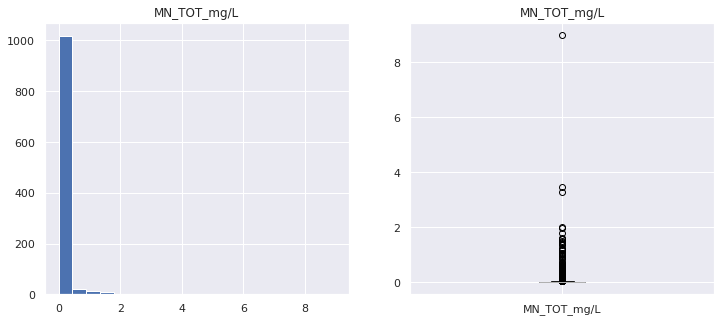


  Potable - Excelente    Puede afectar la salud    Sin efectos en la salud - Puede dar color al agua
---------------------  ------------------------  ---------------------------------------------------
                  982                        50                                                   36


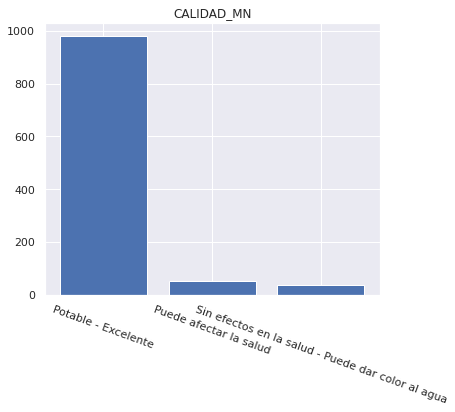


  1    0
---  ---
545  523


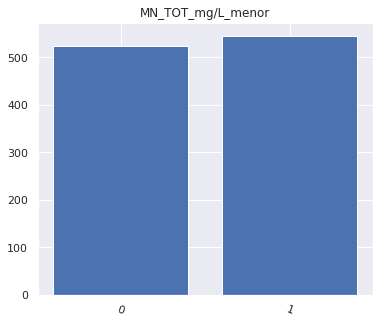

In [ ]:
graficas(mn)

count    1068.000000
mean        0.401001
std         5.538641
min         0.000000
25%         0.000000
50%         0.046960
75%         0.173380
max       178.615000
Name: FE_TOT_mg/L, dtype: float64


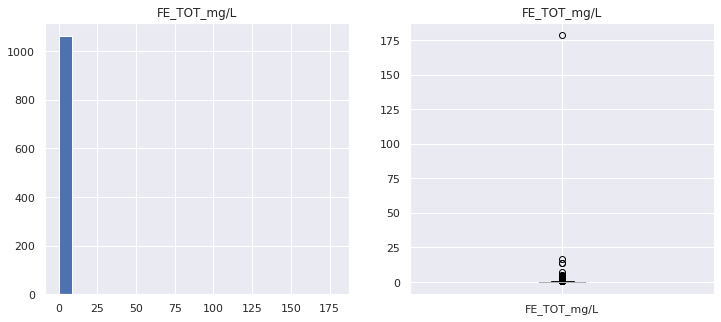


  Potable - Excelente    Sin efectos en la salud - Puede dar color al agua
---------------------  ---------------------------------------------------
                  932                                                  136


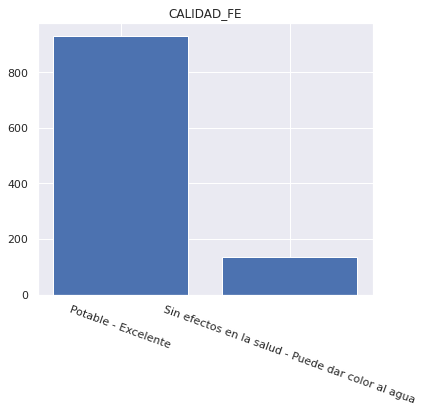


  0    1
---  ---
667  401


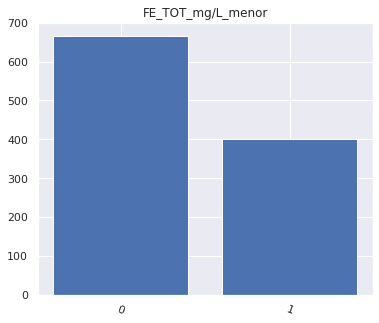

In [ ]:
graficas(fe)


  Verde    Rojo    Amarillo
-------  ------  ----------
    434     387         247


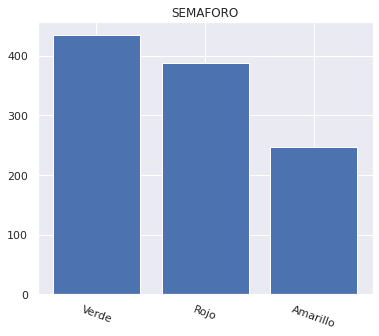

In [ ]:
#Semaforo
graficas(["SEMAFORO"])

Text(0.5, 1.0, 'Presencia promedio de Contaminantes')

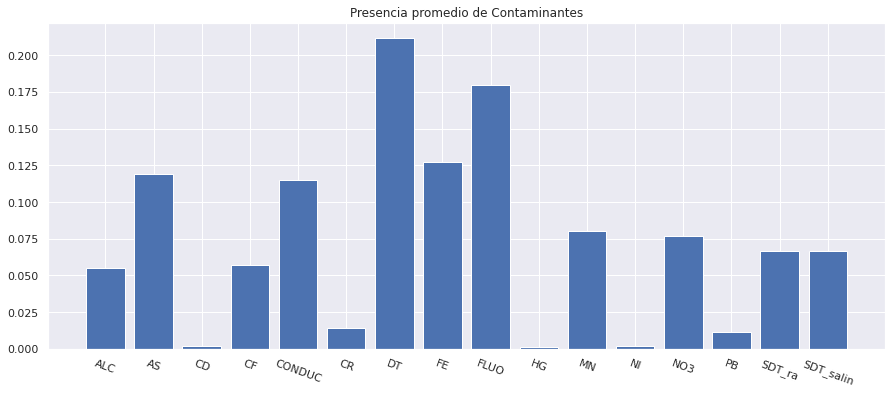

In [ ]:
#Contaminantes
plt.figure(figsize=(15,6))
plt.bar(x= cont, height= ndf[cont].mean())
plt.xticks(rotation= -20)
plt.title("Presencia promedio de Contaminantes")

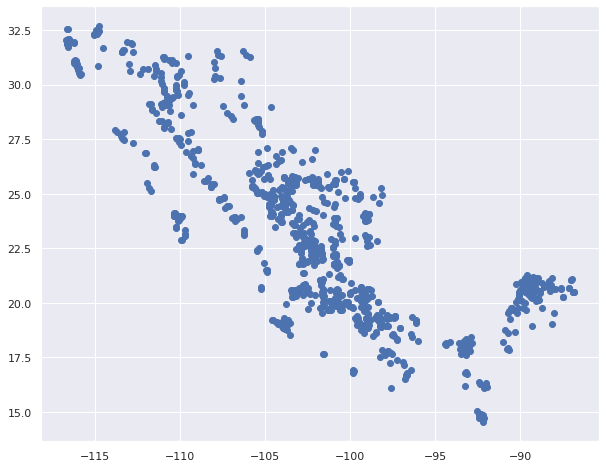

In [ ]:
#Latitud y Longitud
latlong=ndf[["LATITUD","LONGITUD"]]

plt.figure(figsize=(10,8))
plt.scatter(x= ndf["LONGITUD"], y= ndf["LATITUD"])

In [ ]:
#Vamos a quitar del dataframe las variables categóricas y nos quedaremos solo con las numéricas y las que creamos
dropouts = ["CALIDAD_ALC","CALIDAD_CONDUC", "CALIDAD_SDT_ra", "CALIDAD_SDT_salin", "SDT_M_mg/L_menor",
            "CALIDAD_FLUO", "CALIDAD_DUR", "CALIDAD_COLI_FEC", "CALIDAD_N_NO3", "CALIDAD_MN",
            "CALIDAD_AS", "CALIDAD_CD", "CALIDAD_CR", "CALIDAD_HG", "CALIDAD_PB",
            "CALIDAD_FE"]

ndf.drop(dropouts, axis= 1, inplace= True)
ndf.shape

(1068, 43)

In [ ]:
#Validamos como queda nuestro df final
ndf.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,...,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.7320,0.0,4.184656,0.0161,...,0,0,0,0,0,0,0,0,0,0
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,0.0,5.750110,0.0134,...,0,0,0,0,0,0,0,0,0,0
2,-102.28801,22.36685,204.920,532.0,342.0,1.8045,120.7190,0.0,1.449803,0.0370,...,0,0,1,0,0,0,0,0,0,0
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.8790,0.0,1.258597,0.0154,...,0,0,0,0,0,0,0,0,0,0
4,-110.24480,23.45138,309.885,1841.0,1179.0,0.2343,476.9872,291.0,15.672251,0.0000,...,0,0,0,0,0,0,1,0,0,0


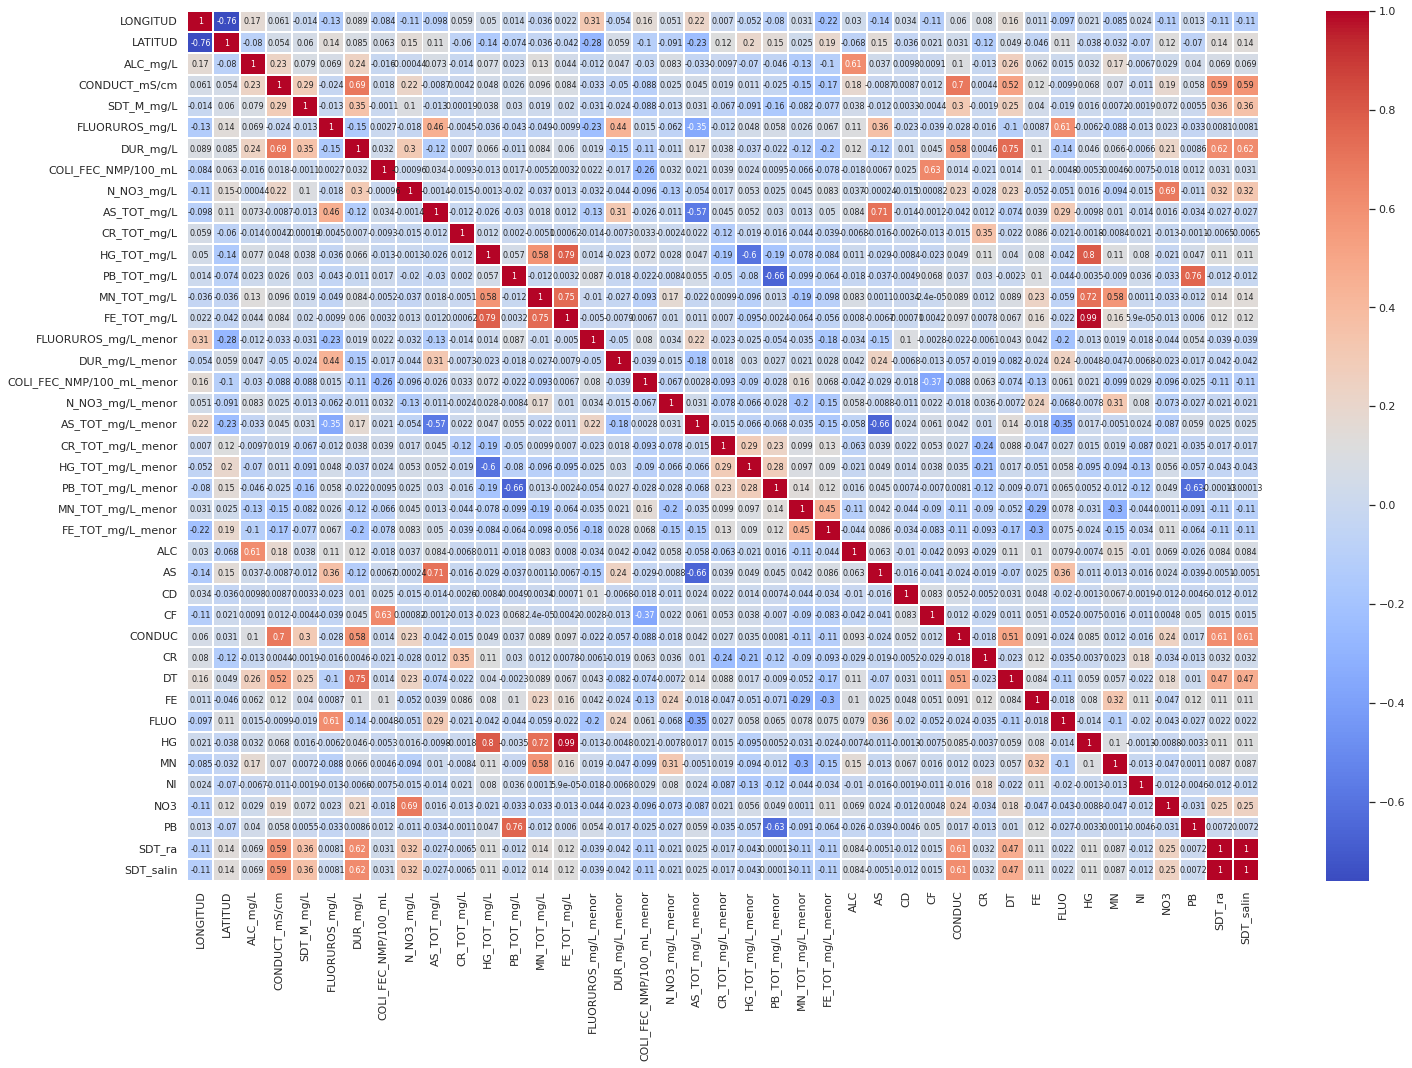

In [ ]:
#Calculamos la correlación entre las variables
plt.figure(figsize=(24,16)) 
sns.heatmap(ndf.corr(), cmap='coolwarm', linewidths = 1, annot=True, annot_kws={"fontsize":8})
plt.show()

# Inicio modelo KMeans
Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
ndf

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,...,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,-102.02210,22.20887,229.990,940.0,603.6000,0.9766,213.7320,0.0,4.184656,0.0161,...,0,0,0,0,0,0,0,0,0,0
1,-102.20075,21.99958,231.990,608.0,445.4000,0.9298,185.0514,0.0,5.750110,0.0134,...,0,0,0,0,0,0,0,0,0,0
2,-102.28801,22.36685,204.920,532.0,342.0000,1.8045,120.7190,0.0,1.449803,0.0370,...,0,0,1,0,0,0,0,0,0,0
3,-102.29449,22.18435,327.000,686.0,478.6000,1.1229,199.8790,0.0,1.258597,0.0154,...,0,0,0,0,0,0,0,0,0,0
4,-110.24480,23.45138,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,231.045,2350.0,1545.8000,0.0000,752.0960,0.0,14.615488,0.0000,...,1,0,0,0,0,0,1,0,0,0
1064,-99.70099,24.78280,256.000,529.0,297.0000,0.0000,273.0000,0.0,77.392000,0.0000,...,0,0,0,0,0,0,1,0,0,0
1065,-99.82249,25.55197,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0000,...,1,0,0,0,0,0,1,0,0,0
1066,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.3680,0.0,0.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ndf.columns

Index(['LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L',
       'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
       'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
       'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO',
       'FLUORUROS_mg/L_menor', 'DUR_mg/L_menor', 'COLI_FEC_NMP/100_mL_menor',
       'N_NO3_mg/L_menor', 'AS_TOT_mg/L_menor', 'CR_TOT_mg/L_menor',
       'HG_TOT_mg/L_menor', 'PB_TOT_mg/L_menor', 'MN_TOT_mg/L_menor',
       'FE_TOT_mg/L_menor', 'ALC', 'AS', 'CD', 'CF', 'CONDUC', 'CR', 'DT',
       'FE', 'FLUO', 'HG', 'MN', 'NI', 'NO3', 'PB', 'SDT_ra', 'SDT_salin'],
      dtype='object')

In [ ]:
latlong['coord'] = list(zip(latlong.LONGITUD, latlong.LATITUD))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
latlong['coord'] = latlong['coord'].apply(Point)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LATITUD,LONGITUD,coord
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)
...,...,...,...
1063,24.76036,-99.54191,POINT (-99.54191 24.76036)
1064,24.78280,-99.70099,POINT (-99.70099 24.78280)
1065,25.55197,-99.82249,POINT (-99.82249 25.55197)
1066,24.80118,-100.32683,POINT (-100.32683 24.80118)


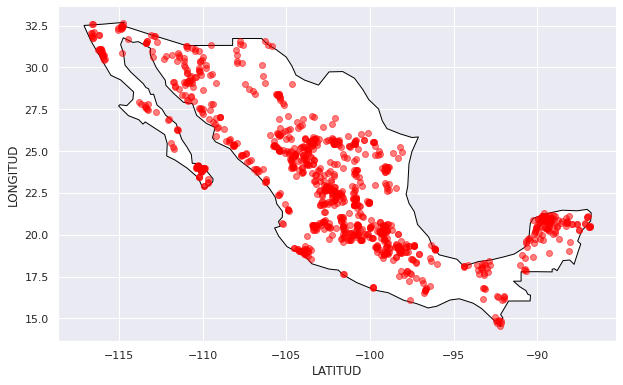

In [ ]:
points_coord = gpd.GeoDataFrame(latlong, geometry="coord")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

points_coord.plot(ax=gax, color='red', alpha = 0.5)
points_coord

In [ ]:
quality = ndf['SEMAFORO']

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
estimators = [
    ("k_means_water_8", KMeans(n_clusters=8)),
    ("k_means_water_3", KMeans(n_clusters=3)),
    ("k_means_water_bad_init", KMeans(n_clusters=20)),
]

In [ ]:
fignum = 1

titles = ["8 clusters", "3 clusters", "20 clusters"]

In [ ]:
quality.unique()

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

In [ ]:
quality.value_counts()


Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [ ]:
X = latlong[['LATITUD','LONGITUD']]
kmeans = KMeans(n_clusters=10).fit(X)

In [ ]:
 ndf['SEMAFORO']

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: SEMAFORO, Length: 1068, dtype: object

In [ ]:
Y = quality.copy()

In [ ]:
X

,LATITUD,LONGITUD
0,22.20887,-102.02210
1,21.99958,-102.20075
2,22.36685,-102.28801
3,22.18435,-102.29449
4,23.45138,-110.24480
...,...,...
1063,24.76036,-99.54191
1064,24.78280,-99.70099
1065,25.55197,-99.82249
1066,24.80118,-100.32683


In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X) 
C = kmeans.cluster_centers_ 

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,Coordinates
0,17.004097,-92.761627,POINT (17.004 -92.762)
1,29.427649,-106.395956,POINT (29.428 -106.396)
2,20.546897,-89.188374,POINT (20.547 -89.188)
3,25.078067,-104.011010,POINT (25.078 -104.011)
4,31.614292,-115.251913,POINT (31.614 -115.252)
5,29.203521,-110.992920,POINT (29.204 -110.993)
6,20.348589,-102.435302,POINT (20.349 -102.435)
7,24.733573,-109.261826,POINT (24.734 -109.262)
8,23.393120,-100.969413,POINT (23.393 -100.969)
9,19.187807,-98.526051,POINT (19.188 -98.526)


In [ ]:
labels.max()

9

In [ ]:
geo["Class"]

0       2
1       2
2       0
3       2
4       0
       ..
1063    0
1064    0
1065    0
1066    2
1067    2
Name: Class, Length: 1068, dtype: int64

# GRAFICADO

In [ ]:
#Definimos conjuntos a usar por el modelo
geo = ndf[["LONGITUD","LATITUD"]]
y = ndf[["SEMAFORO"]]

print(geo.head())
print(y.head())

    LONGITUD   LATITUD
0 -102.02210  22.20887
1 -102.20075  21.99958
2 -102.28801  22.36685
3 -102.29449  22.18435
4 -110.24480  23.45138
  SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo


In [ ]:
from sklearn.cluster import KMeans

#Entrenamos el modelo de clusters
#Definimos número de almacenes deseados
num_clusters=10

#Ajustamos el modelo
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(geo)

#Recuperamos los clusters calculados
centers = kmeans.cluster_centers_

In [ ]:
#Generamos DF de clusters y anexamos coordenadas
clusters = pd.DataFrame()                                         #Iniciamos un dataframe
clusters["Coordinates"] = list(zip(centers[:,0], centers[:,1]))   #Empaquetamos la latitud y l0ongitud en una sola columna
clusters["Coordinates"] = clusters["Coordinates"].apply(Point)  #Les aplicamos la función point a cada conjunto de coordenadas

#Convertimos el DF en uno geoespacial para las graficas
clusters = gpd.GeoDataFrame(clusters, geometry="Coordinates")
clusters.head()

,Coordinates
0,POINT (-104.01101 25.07807)
1,POINT (-98.51413 19.18480)
2,POINT (-109.26183 24.73357)
3,POINT (-89.18837 20.54690)
4,POINT (-110.99292 29.20352)


In [ ]:
#Instalamos geopandas
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Preparamos nuestros datos geoespaciales
import geopandas as gpd
from shapely.geometry import Point

#Definimos nuevo dataframe solo con las coordenadas de las tiendas y lo mostramos
geo = pd.DataFrame()
geo["Coordinates"] = list(zip(ndf.LONGITUD, ndf.LATITUD))
geo["Coordinates"] = geo["Coordinates"].apply(Point)

#Convertimos el DataFrame a Geoespacial
geo = gpd.GeoDataFrame(geo, geometry="Coordinates")
geo.head()

#Agregamos la clasificación del semáforo
geo["Class"]= ndf['SEMAFORO']

In [ ]:
geo["Class"]

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: Class, Length: 1068, dtype: object

In [ ]:
#Localizamos el mapa de Mexico
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.loc[world['continent'] == "North America"]
world.loc[world['name'] == "Mexico"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


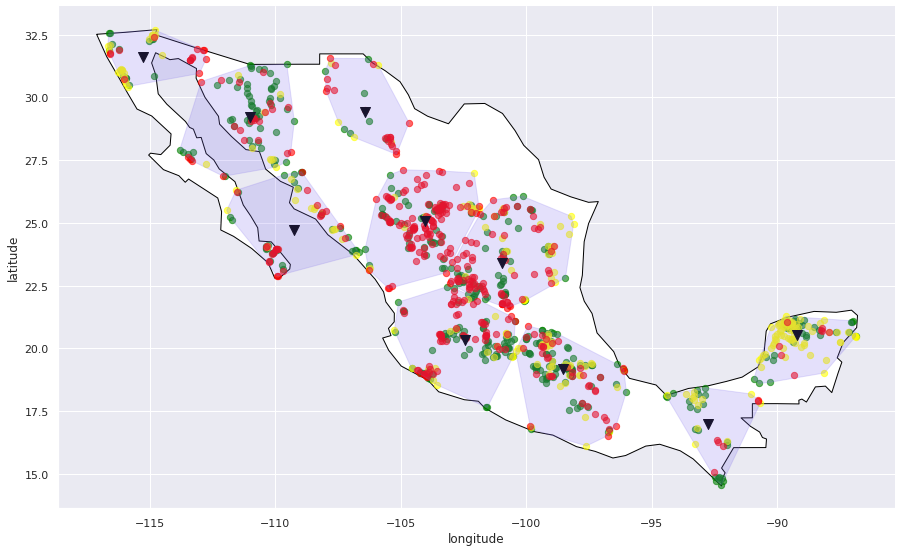

In [ ]:
from scipy.spatial import ConvexHull

#Graficamos
fig, gax = plt.subplots(figsize=(15,15))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

#Nombramos los ejes
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

#Agregamos la capa de las estaciones de medición
geo.loc[geo['Class'] == "Verde"].plot(ax=gax, color='green', alpha = 0.6, markersize=40)
geo.loc[geo['Class'] == "Amarillo"].plot(ax=gax, color='yellow', alpha = 0.6, markersize=40)
geo.loc[geo['Class'] == "Rojo"].plot(ax=gax, color='red', alpha = 0.6, markersize=40)

#Agregamos la capa de clusters
clusters.plot(ax=gax, color='black', alpha = 1, marker="v", markersize=100)

#Quitamos los datos impresos
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

##### Graficamos el área entre puntos asignados a un cluster
clasi = kmeans.labels_
clasi

borders = latlong
borders["clasi"] = clasi
borders.head()

for i in borders.clasi.unique():
    points = borders[borders.clasi == i][['LONGITUD', 'LATITUD']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.2, c='mediumslateblue')
